In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

<AxesSubplot:>

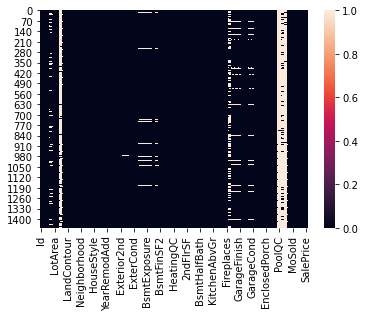

In [38]:
import seaborn as sns
sns.heatmap(df.isnull())

In [39]:
df.drop('PoolQC',axis=1, inplace=True)

In [40]:
df.drop('Alley',axis=1, inplace=True)

In [41]:
df.drop('Fence',axis=1, inplace=True)

In [42]:
df.drop('FireplaceQu',axis=1, inplace=True)

In [43]:
df.drop('LotFrontage',axis=1, inplace=True)

In [44]:
df.drop('MiscFeature',axis=1, inplace=True)

In [45]:
numerical_features = df.select_dtypes([int, float]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [46]:
df["MasVnrArea"].dropna()

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1452, dtype: float64

In [47]:
df["GarageYrBlt"].dropna()

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1379, dtype: float64

In [48]:
categorical_features = df.select_dtypes([object]).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
df[categorical_features].isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [50]:
import statistics
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)

In [51]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

In [52]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)

In [53]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)

In [54]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)

In [55]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [56]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [57]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [58]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [60]:
df["SalePrice"].dropna()

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

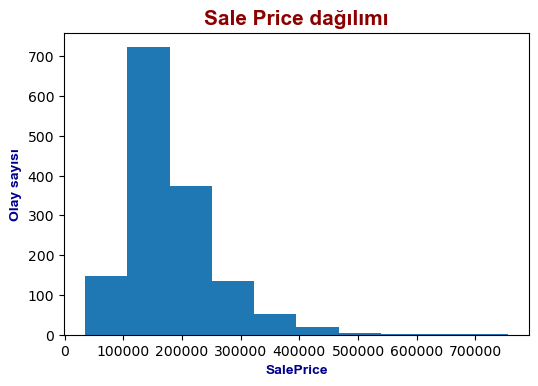

In [66]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(df.SalePrice)
plt.title("Sale Price dağılımı", fontdict = baslik_font)
plt.xlabel("SalePrice", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

In [68]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [71]:
df["street_new"] = pd.get_dummies(df.Street, drop_first=True)
df["street_new"] = df.Street.replace({'Pave':1, "Grvl":0})
df["street_new"].head()

0    1
1    1
2    1
3    1
4    1
Name: street_new, dtype: int64

In [72]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [84]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [85]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['HouseStyle_new'] = labelencoder.fit_transform(df['HouseStyle'])
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street_new,HouseStyle_new
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,1,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1,2
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,1,5
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1,5
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1,5
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1,2
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1,5
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1,2


<Figure size 600x400 with 0 Axes>

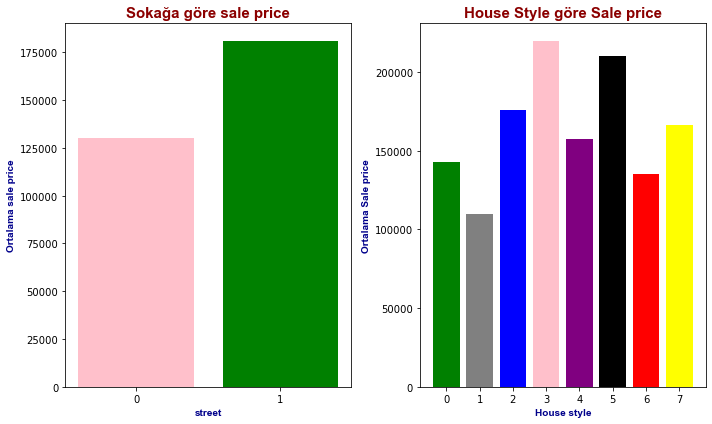

In [95]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(df.groupby("street_new")["SalePrice"].mean().index, 
          df.groupby("street_new")["SalePrice"].mean(),
        color=("pink","green"))
plt.title("Sokağa göre sale price", fontdict = baslik_font)
plt.ylabel("Ortalama sale price", fontdict = eksen_font)
plt.xlabel("street", fontdict = eksen_font)
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(df.groupby("HouseStyle_new")["SalePrice"].mean().index, 
        df.groupby("HouseStyle_new")["SalePrice"].mean(),
        color=("green","grey","blue","pink","purple","black","red","yellow"))
plt.title("House Style göre Sale price", fontdict = baslik_font)
plt.ylabel("Ortalama Sale price", fontdict = eksen_font)
plt.xlabel("House style", fontdict = eksen_font)
plt.xticks([0,1,2,3,4,5,6,7])

plt.tight_layout()
plt.show()

In [102]:
from sklearn import linear_model
Y = df['SalePrice']
X = df[['street_new','HouseStyle_new']]

In [103]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [104]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [45664.43313459  7452.13428332]
Sabit değer (bias): 
 112802.18667224549


In [106]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()
#R-squared değeri çok düşük :(

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     25.49
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.31e-11
Time:                        16:04:42   Log-Likelihood:                -18519.
No. Observations:                1460   AIC:                         3.704e+04
Df Residuals:                    1457   BIC:                         3.706e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.128e+05    3.2e+04      3.525      0.000       5e+04    1.76e+05
street_new      4.566e+04    3.2e+04      1.428      0.153   -1.71e+04    1.08e+05
HouseStyle_new  7452.1343   1070.647      6.960      0.000    5351.960    9552.308
==============================================================================
Omnibus:                      621.712   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3518.773
Skew:                           1.919   Prob(JB):                         0.00
Kurtosis:                       9.566   Cond. No.                         83.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""